<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/%5B1%5D_multi_mqttset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/drive


# Pre processing data

In [2]:
train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv")
test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv")
train = pd.DataFrame(train)
test = pd.DataFrame(test)

# data shape
print("Train shape: ", train.shape)
print("Test shape: ", test.shape, "\n")

print("Train target:\n", train['target'].value_counts())
print("Test target:\n",test['target'].value_counts())

Train shape:  (14000000, 34)
Test shape:  (6000000, 34) 

Train target:
 target
legitimate    7000000
bruteforce    1400000
flood         1400000
slowite       1400000
dos           1400000
malformed     1400000
Name: count, dtype: int64
Test target:
 target
legitimate    3000000
dos            600000
slowite        600000
flood          600000
bruteforce     600000
malformed      600000
Name: count, dtype: int64


In [3]:
# features countais only values equal to 0
print(train['mqtt.conack.flags.reserved'].unique())
print(train['mqtt.conack.flags.sp'].unique())
print(train['mqtt.conflag.qos'].unique())
print(train['mqtt.conflag.reserved'].unique())
print(train['mqtt.conflag.retain'].unique())
print(train['mqtt.conflag.willflag'].unique())
print(train['mqtt.sub.qos'].unique())
print(train['mqtt.suback.qos'].unique())
print(train['mqtt.willmsg'].unique())
print(train['mqtt.willmsg_len'].unique())
print(train['mqtt.willtopic'].unique())
print(train['mqtt.willtopic_len'].unique())

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [4]:
# columns_0 are columns with values equal to 0
columns_0 = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len']

train = train.drop(columns_0, axis=1)
test = test.drop(columns_0, axis=1)

# new data shape
print(train.shape)
print(test.shape)

(14000000, 22)
(6000000, 22)


In [5]:
# data balancing

# train
x = []
for i in train.index:
    if train['target'][i] == 'legitimate':
        x.append(i)

x = x[:5600000]
train = train.drop(x)

# ------------------------------------------------------------------------------

#test
x = []
for i in test.index:
    if test['target'][i] == 'legitimate':
        x.append(i)

x = x[:2400000]
test = test.drop(x)


# new data shape
print(train['target'].value_counts())
print(test['target'].value_counts())

target
bruteforce    1400000
flood         1400000
slowite       1400000
dos           1400000
malformed     1400000
legitimate    1400000
Name: count, dtype: int64
target
dos           600000
slowite       600000
flood         600000
bruteforce    600000
malformed     600000
legitimate    600000
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# features and target
train['tcp.flags'] = label.fit_transform(train['tcp.flags'])
train['mqtt.conack.flags'] = label.fit_transform(train['mqtt.conack.flags'])
train['mqtt.hdrflags'] = label.fit_transform(train['mqtt.hdrflags'])
train['mqtt.protoname'] = label.fit_transform(train['mqtt.protoname'])
train['mqtt.msg'] = label.fit_transform(train['mqtt.msg'])
train['mqtt.conflags'] = label.fit_transform(train['mqtt.conflags'])
train['target'] = label.fit_transform(train['target'])

test['tcp.flags'] = label.fit_transform(test['tcp.flags'])
test['mqtt.conack.flags'] = label.fit_transform(test['mqtt.conack.flags'])
test['mqtt.hdrflags'] = label.fit_transform(test['mqtt.hdrflags'])
test['mqtt.protoname'] = label.fit_transform(test['mqtt.protoname'])
test['mqtt.msg'] = label.fit_transform(test['mqtt.msg'])
test['mqtt.conflags'] = label.fit_transform(test['mqtt.conflags'])
test['target'] = label.fit_transform(test['target'])

In [7]:
X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

# convert to numpy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Decision Tree

Accuracy train:  0.8796972619047619
Cross-validation scores: [0.87967262 0.8796756  0.87950536 0.87966845 0.87978036]
Average cross-validation score: 0.88 

Accuracy test:  0.8799933333333333 

Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83    600000
           1       0.91      0.89      0.90    600000
           2       0.87      0.88      0.88    600000
           3       0.85      0.90      0.88    600000
           4       0.89      0.72      0.80    600000
           5       1.00      1.00      1.00    600000

    accuracy                           0.88   3600000
   macro avg       0.88      0.88      0.88   3600000
weighted avg       0.88      0.88      0.88   3600000
 

Confusion matrix: 
 [[529903  25805   1197    472  42623      0]
 [  7783 533384  20553  27780  10500      0]
 [  1200   4800 529200  63600   1200      0]
 [    58   8568  50257 540549    568      0]
 [141420  15960   5640   2040 434940 

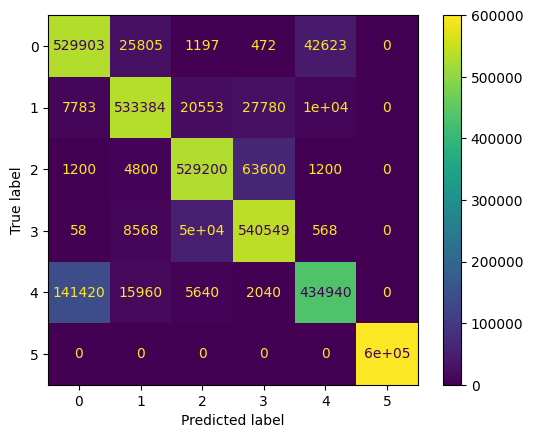

In [8]:
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, random_state=42)
tree.fit(X_train, y_train)

print("Accuracy train: ", tree.score(X_train, y_train))

# cross validation
scores = cross_val_score(tree, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()),"\n")
print("Accuracy test: ", tree.score(X_test, y_test), "\n")

# classification report
predict_tree = tree.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_tree), "\n")

# confusion matrix
matrix_tree = confusion_matrix(y_test, predict_tree)
print("Confusion matrix: \n",matrix_tree, "\n")
cm_tree = confusion_matrix(y_test, predict_tree, labels=tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree.classes_)
disp_tree.plot()
plt.show()

# Random Forest

Accuracy train:  0.8796972619047619
Cross-validation scores: [0.87965119 0.87966369 0.87950536 0.87966845 0.87977976]
Average cross-validation score: 0.88 

Accuracy test:  0.8800316666666667 

Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83    600000
           1       0.91      0.89      0.90    600000
           2       0.87      0.88      0.88    600000
           3       0.85      0.90      0.88    600000
           4       0.89      0.73      0.80    600000
           5       1.00      1.00      1.00    600000

    accuracy                           0.88   3600000
   macro avg       0.88      0.88      0.88   3600000
weighted avg       0.88      0.88      0.88   3600000
 

Confusion matrix:
 [[529301  25805   1197    472  43225      0]
 [  7757 533384  20553  27780  10526      0]
 [  1200   4800 529200  63600   1200      0]
 [    58   8568  50257 540689    428      0]
 [140820  15960   5640   2040 435540  

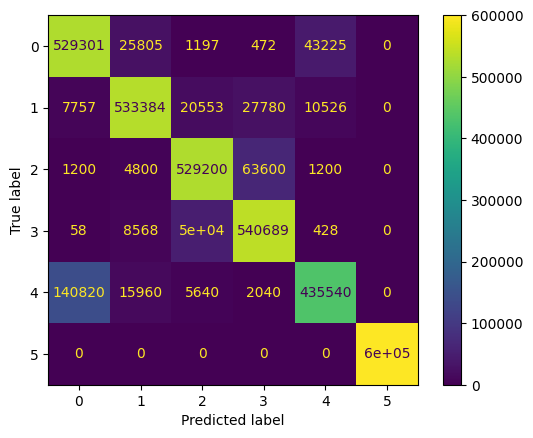

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy train: ", rf.score(X_train, y_train))

# cross validation
scores_rf = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores_rf))
print("Average cross-validation score: {:.2f}".format(scores_rf.mean()),"\n")

print("Accuracy test: ", rf.score(X_test, y_test), "\n")


# classification report
predict_rf = rf.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_rf), "\n")

# confusion matrix
matrix_rf = confusion_matrix(y_test, predict_rf)
print("Confusion matrix:\n", matrix_rf, "\n")
cm_rf = confusion_matrix(y_test, predict_rf, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot()
plt.show()

# Multi-layer perceptron

Accuracy train:  0.817695119047619
Cross-validation scores: [0.79984821 0.79971726 0.79528214 0.79914167 0.79771726]
Average cross-validation score: 0.80 

Accuracy test:  0.8183019444444445 

Classification report: 
              precision    recall  f1-score   support

           0       0.70      0.80      0.74    600000
           1       1.00      0.72      0.84    600000
           2       0.74      0.89      0.81    600000
           3       0.76      0.85      0.80    600000
           4       0.80      0.65      0.72    600000
           5       1.00      1.00      1.00    600000

    accuracy                           0.82   3600000
   macro avg       0.83      0.82      0.82   3600000
weighted avg       0.83      0.82      0.82   3600000
 

Confusion matrix:
 [[478836      0   6981  20705  93478      0]
 [ 19992 430401  68967  80431    209      0]
 [  3600      0 534000  60000   2400      0]
 [   518      0  87552 511930      0      0]
 [185220      0  22140   1920 390720   

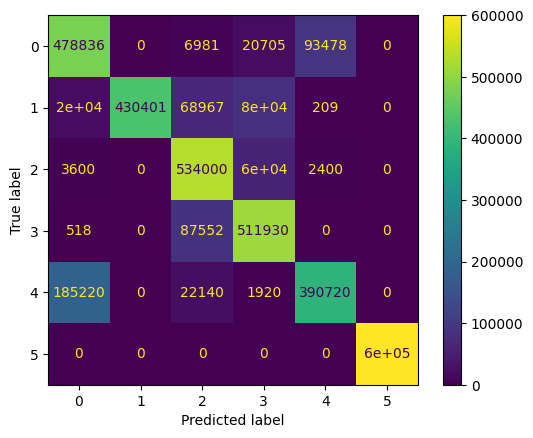

In [10]:
mlp = MLPClassifier(solver='adam', shuffle=True, random_state=0, alpha=0.0000001)
mlp.fit(X_train, y_train)
print("Accuracy train: ", mlp.score(X_train, y_train))

# cross validation
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores_mlp))
print("Average cross-validation score: {:.2f}".format(scores_mlp.mean()),"\n")

print("Accuracy test: ", mlp.score(X_test, y_test), "\n")

# classification report
predict_mlp = mlp.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_mlp), "\n")

# confusion matrix
matrix_mlp = confusion_matrix(y_test, predict_mlp)
print("Confusion matrix:\n", matrix_mlp, "\n")
cm_mlp = confusion_matrix(y_test, predict_mlp, labels=mlp.classes_)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp.classes_)
disp_mlp.plot()
plt.show()